In [5]:
!unzip "/content/ddos_veri_sade.zip" -d "/content/ddos_veri_sade"

Archive:  /content/ddos_veri_sade.zip
  inflating: /content/ddos_veri_sade/ddos_veri_sade.csv  


# Yeni Bölüm

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [11]:
# CSV dosyasının tam adını buraya yaz
df = pd.read_csv('/content/ddos_veri_sade/ddos_veri_sade.csv')  # dosya adını gerektiği gibi değiştir

# Veri yapısına hızlıca bakalım
df.head()

,syn_flag_number,syn_count,Header_Length,TCP,ack_flag_number,UDP,Protocol Type,Tot size,AVG,ack_count,...,Rate,Max,HTTPS,Time_To_Live,psh_flag_number,Min,Tot sum,rst_flag_number,IPv,label
0,0.153907,0.160389,0.977509,0.666349,1.276726,-0.646579,-0.605654,-0.317200,-0.317200,6.220507,...,-0.600588,0.032517,-0.503911,-0.352299,-0.300972,-0.117232,0.014097,11.977173,0.205161,benign
1,-0.361245,-0.563636,0.769075,-0.012960,1.084734,-0.200365,-0.605654,-0.186878,-0.186878,0.249375,...,-0.785212,-0.053986,0.038993,0.018978,0.559992,-0.077512,-0.691070,-0.117375,0.205161,benign
2,-0.595405,-0.586992,1.394377,0.455529,1.907556,-0.435214,-0.605654,1.690998,1.690998,0.543037,...,-0.787455,2.025949,1.753424,1.151586,4.386502,-0.077512,0.255423,-0.117375,0.205161,benign
3,-0.595405,-0.586992,1.081726,0.221285,1.633282,-0.200365,-0.605654,-0.081752,-0.081752,0.445149,...,-0.779962,0.129833,-0.532485,0.121943,2.473247,-0.103992,-0.638084,-0.117375,0.205161,benign
4,-0.595405,-0.586992,1.081726,0.221285,1.633282,-0.200365,-0.605654,0.478269,0.478269,0.445149,...,-0.778010,0.774744,1.753424,2.750562,0.559992,-0.077512,-0.355821,-0.117375,0.205161,benign


In [12]:
# 🔹 1. Veri hazırlığı: Özellikler (X) ve etiket (y)
X = df.iloc[:, :-1]  # Son sütun hariç tüm sütunlar
y = df.iloc[:, -1]   # Son sütun (etiket)

In [13]:
# 🔹 2. Eğitim/Test verisi ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# 🔹 3. Model oluşturma ve eğitme
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [15]:
# 🔹 4. Feature importance hesaplama
importances = model.feature_importances_
feature_names = X.columns

In [16]:
# 🔹 5. Önem sırasına göre sırala
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

In [17]:
# 🔹 6. Sonuçları yazdır
print("Özellik Önem Düzeyleri:")
print(importance_df)

Özellik Önem Düzeyleri:
            Feature  Importance
0   syn_flag_number    0.198449
1         syn_count    0.132543
5               UDP    0.113260
3               TCP    0.098323
2     Header_Length    0.085656
4   ack_flag_number    0.078382
8               AVG    0.071520
7          Tot size    0.056001
6     Protocol Type    0.044010
9         ack_count    0.038248
10              IAT    0.037748
11             Rate    0.022312
13            HTTPS    0.008606
15  psh_flag_number    0.005032
14     Time_To_Live    0.003110
17          Tot sum    0.002700
18  rst_flag_number    0.001749
12              Max    0.001462
16              Min    0.000504
19              IPv    0.000385


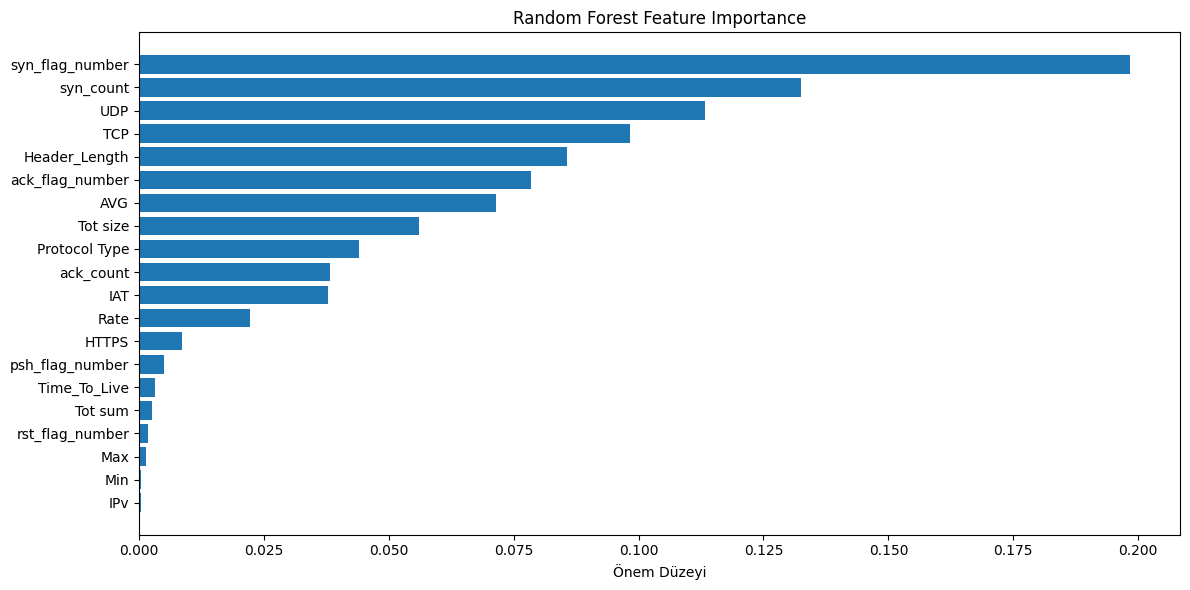

In [18]:
# 🔹 7. Görselleştir (grafik çiz)
plt.figure(figsize=(12, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Önem Düzeyi')
plt.title('Random Forest Feature Importance')
plt.gca().invert_yaxis()  # En önemli özelliği en üste al
plt.tight_layout()
plt.show()

In [2]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.8 MB/s eta 0:00:00


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier



In [7]:
# Veriyi yükle (dosya yolunu kendi dosyana göre ayarla)
df = pd.read_csv('/content/ddos_veri_sade/ddos_veri_sade.csv')

# Etiketin tipi int değilse dönüştür
# "benign" -> 0, diğer her şey (örneğin ddos) -> 1
df['label'] = df['label'].apply(lambda x: 0 if x.lower() == 'benign' else 1)


# İlk birkaç satıra göz atalım
df.head()

,syn_flag_number,syn_count,Header_Length,TCP,ack_flag_number,UDP,Protocol Type,Tot size,AVG,ack_count,...,Rate,Max,HTTPS,Time_To_Live,psh_flag_number,Min,Tot sum,rst_flag_number,IPv,label
0,0.153907,0.160389,0.977509,0.666349,1.276726,-0.646579,-0.605654,-0.317200,-0.317200,6.220507,...,-0.600588,0.032517,-0.503911,-0.352299,-0.300972,-0.117232,0.014097,11.977173,0.205161,0
1,-0.361245,-0.563636,0.769075,-0.012960,1.084734,-0.200365,-0.605654,-0.186878,-0.186878,0.249375,...,-0.785212,-0.053986,0.038993,0.018978,0.559992,-0.077512,-0.691070,-0.117375,0.205161,0
2,-0.595405,-0.586992,1.394377,0.455529,1.907556,-0.435214,-0.605654,1.690998,1.690998,0.543037,...,-0.787455,2.025949,1.753424,1.151586,4.386502,-0.077512,0.255423,-0.117375,0.205161,0
3,-0.595405,-0.586992,1.081726,0.221285,1.633282,-0.200365,-0.605654,-0.081752,-0.081752,0.445149,...,-0.779962,0.129833,-0.532485,0.121943,2.473247,-0.103992,-0.638084,-0.117375,0.205161,0
4,-0.595405,-0.586992,1.081726,0.221285,1.633282,-0.200365,-0.605654,0.478269,0.478269,0.445149,...,-0.778010,0.774744,1.753424,2.750562,0.559992,-0.077512,-0.355821,-0.117375,0.205161,0


In [8]:
X = df.drop('label', axis=1)
y = df['label']

# Z-score standardizasyon
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42),
    "SVC": SVC(kernel='rbf', C=1.0, gamma='scale', probability=True, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42)
}

In [10]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted', zero_division=0),
        "Recall": recall_score(y_test, y_pred, average='weighted', zero_division=0),
        "F1 Score": f1_score(y_test, y_pred, average='weighted', zero_division=0)
    })

results_df = pd.DataFrame(results).sort_values(by="F1 Score", ascending=False)
results_df


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:05:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


,Model,Accuracy,Precision,Recall,F1 Score
4,XGBoost,0.999762,0.999763,0.999762,0.999763
5,CatBoost,0.999750,0.999750,0.999750,0.999750
2,SVC,0.999675,0.999675,0.999675,0.999675
3,KNN,0.999513,0.999513,0.999513,0.999513
0,Decision Tree,0.999300,0.999300,0.999300,0.999300
1,Random Forest,0.998687,0.998692,0.998687,0.998688


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Accuracy'].plot(kind='hist', bins=20, title='Accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Precision'].plot(kind='hist', bins=20, title='Precision')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Recall'].plot(kind='hist', bins=20, title='Recall')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='index', y='Accuracy', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Accuracy', y='Precision', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Precision', y='Recall', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='Recall', y='F1 Score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Accuracy'].plot(kind='line', figsize=(8, 4), title='Accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Precision'].plot(kind='line', figsize=(8, 4), title='Precision')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['Recall'].plot(kind='line', figsize=(8, 4), title='Recall')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='index', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='Accuracy', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='Precision', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_16['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_16, x='Recall', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

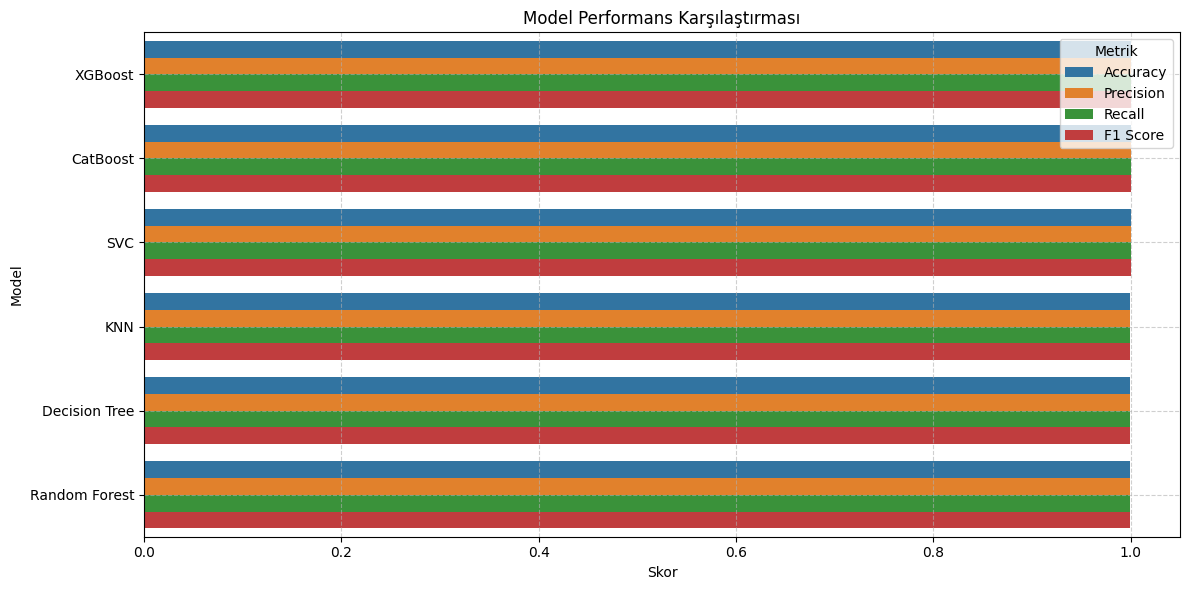

In [11]:
plt.figure(figsize=(12, 6))
results_melted = results_df.melt(id_vars="Model", var_name="Metric", value_name="Score")
sns.barplot(x="Score", y="Model", hue="Metric", data=results_melted)
plt.title("Model Performans Karşılaştırması")
plt.xlabel("Skor")
plt.ylabel("Model")
plt.legend(title="Metrik")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
